# Scikit-learn ML 기본 동작
---
1) 데이터 수집 & 준비
2) 데이터 전처리
 - 데이터 / 타겟 분리
 - 데이터 표준화 / 정규화
 - 타겟(라벨) 인코딩
3) 학습위한 데이터 준비
 - 데이터셋
   * 학습용 데이터셋 => 학습 전용
   * 검즘용 데이터셋 => 모델 생성 중에 사용
   * 테스트용 데이터셋 => 모델 완성 후 사용
4) 학습 모델 생성
 - 학습 방법 선정 및 모델 객체 생성
 - 학습 진행
   * <b>모델 파라미터</b> 최적화 => 학습에 의해서 결정되는 파라미터
   * 최적의 모델 파라미터를 찾기 위한 방법 => 최적화(Optimizer)
   * 예) W가중치, b절편
 - 모델 평가
   * 성능 개선 => <b>하이퍼 파라미터</b>(성능에 큰 영향을 미치는 파라미터, 모델마다 다름) => 모델 튜닝
   * 예) KNN의 K, 학습횟수, 학습크기(배치 사이즈), 규제 값들
5) 모델 테스트
 - 학습에 사용되지 않은 데이터로 진행(임의의 test데이터)
 - 새로운 데이터로 테스트 진행(완전히 새로운 데이터)


In [1]:
# 모듈 로딩
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## [1] 데이터 준비

In [2]:
# 시간 : 점수
x=[2,4,6,8,10,12]
y=[40,50,60,70,80,90]

## [2] 데이터 분포 분석 => EDA => 시각화

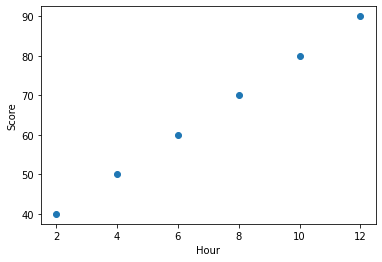

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel("Hour")
plt.ylabel("Score")
plt.show()

- 시간과 점수는 비례관계
- 선형의 데이터 분포
- 독립변수 => hour
- 종속변수 => score

In [12]:
# 학습에 사용되는 형태로 데이터 변환
import pandas as pd
df=pd.DataFrame({'hour':x,'score':y})
print('shape:', df.shape)

shape: (6, 2)


In [16]:
import numpy as np

arrX=np.array(x)
arrY=np.array(y)

print('arrX:', arrX.shape, 'arrY:', arrY.shape)

# 1차원 -> 2차원
arrX=arrX.reshape(-1,1)
print('arrX:', arrX.shape, arrX.ndim, 'arrY:', arrY.shape, arrY.ndim)

arrX: (6,) arrY: (6,)
arrX: (6, 1) 2 arrY: (6,) 1


## [3] 학습 방법 선택 및 모델 생성
---
- 시간에 따른 점수 예측
- 데이터 + 라벨 => 지도학습
- 선형 데이터 분표 => 선형 모델 적용

In [4]:
# 모델 객체 생성
model = LinearRegression()

In [17]:
# 학습 => 트레이닝 데이터 사용
# fit() 메서드 => 2차원 형태의 데이터 사용(y는 1차원도 됨)
model.fit(arrX, arrY)

LinearRegression()

In [18]:
# 모델 파라미터 => w가중치, b절편
print('w:', model.coef_, 'b:', model.intercept_)

w: [5.] b: 30.0


## [4] 모델 평가
---
- 테스트(검증) 데이터로 평가
- score()
  * 분류 : 정답 -- 예측답 => 맞춘 정도
    - 정확도(accuracy)
  * 회귀 : 정답 -- 예측답 => 차이 오차(Error)
    - 손실함수(Loss/Cost Function) : MSE, MAE, RMSE 낮을수록 좋음
    - R2 계수 : 0~1사이의 값, 높을수록 좋음

In [19]:
# 회귀 => 결정계수 R^2 반환
model.score(arrX, arrY)

1.0

In [20]:
# 오차 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error

preY=model.predict(arrX)
mae=mean_absolute_error(arrY, preY)
mse=mean_squared_error(arrY, preY)

print(mae, mse)

0.0 0.0
